## Importing the dependencies

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelBinarizer, StandardScaler

In [7]:
pd.set_option('display.max_columns', 60)

# DATASET

In [8]:
df = pd.read_csv('train.csv', na_values=[-1])
df.shape

(595212, 59)

# USER FUNCTIONS

In [9]:
def missing_info(val):

    '''    
    Missing informtion and dataset information
    on a dataframe.
    
    '''
    
    dtypes = val.dtypes
    nuniq = val.T.apply(lambda x: x.nunique(), axis=1)
    total = val.isna().sum()
    count = val.shape[0]
    percent = round(total / count * 100, 1)
    
    mdf = pd.concat([total, percent, nuniq, dtypes],
                    keys=['Missing', 'Missing %',
                          'UniqueVals', 'Dtype'], axis=1)

    return mdf

In [10]:
def variable_plotter(a, b, labela, labelb, title=None, xlabel=None, ylabel=None, bar=True):
    
    '''
      
    The functions plots graph between two variables.
    bar = True by default, else Line
    title, xlabel, ylabel: Pass as type str.
    
    Returns: Plot
    
    '''

    s = []
    t = []
    s.append(a)
    t.append(b)
    pr = pd.DataFrame(list(zip(s, t)), columns=[labela, labelb])
    if bar == True:
        plt.figure(figsize=(12,5))
        pr.plot(kind='bar', figsize=(10, 6))
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=15)
        plt.ylabel(ylabel, fontsize=15)

    else:
        plt.figure(figsize=(12,5))
        pr.plot(kind='line', figsize=(10, 6))
        plt.title(title, fontsize=15)
        plt.xlabel(xlabel, fontsize=15)
        plt.ylabel(ylabel, fontsize=15)

In [11]:
def run_classifier(xtr, ytr, xt, yt, clf):

    '''
       
    The function inputs train test split dataset
    and computes various classification metrics 
    like Accuracy, Precision, Recall, F1 and
    ROC scores after making predictions on the 
    test set and plots them against each other.
    
    Returns: 4 Scores between 0 and 1.
    Return: Plot
    
    '''
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, accuracy_score
    from sklearn.metrics import classification_report, confusion_matrix

    
    clf.fit(xtr, ytr)
    pred = clf.predict(xt)

    acc = round(accuracy_score(yt, pred), 2)
    cm = confusion_matrix(yt, pred)

    pr = round(precision_score(yt, pred), 3)
    re = round(recall_score(yt, pred), 3)
    f1 = round(f1_score(yt, pred), 3)
    roc = round(roc_auc_score(yt, pred), 3)    
    
    cr = classification_report(yt, pred, output_dict=True)
    cr = pd.DataFrame(cr).T
    
    
    for i in cr.columns:
        cr[i] = round(cr[i], 3)
    
    print('\n\t\t\033[1;4;30mClassification Report\033[0m')
    display(cr)
    
    
    print(f'\n\033[1;30mAccuracy:\033[0m {round(acc*100, 1)}%')
    print(f'\033[1;30mPrecision Score:\033[0m {round(pr, 3)} | \033[1;30mRecall Score:\033[0m {round(re, 3)}')    
    print(f'\033[1;31mF1 Score\033[0m: {round(f1, 3)}\t| \033[1;30mROC Score:\033[0m {round(roc, 3)}')
    print(f'\n\033[1;30mConfusion Matrix:\033[0m \n{cm}')
        
    dx = pd.DataFrame({'Accuracy':[acc], 'Precision': [pr], 'Recall': [re],
                             'F1-Score': [f1], 'ROC': [roc]}).T  #.plot(kind='bar', figsize=(14,6))
    
    dx.rename(columns={0: 'Scores'}, inplace=True)
    plt.figure(figsize=(14,6))
    graph = sns.barplot(dx.index, dx.Scores, palette='Accent')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Scores', fontsize=15)
    plt.ylabel('Metric Score', fontsize=15)
    plt.title('All Metrics of Model', fontsize=15)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x() + p.get_width() / 2, height + 0, height, ha="center", fontsize=13)

    return pr, re, f1, acc

#  <font color='DODGERBLUE'>EXPLORATORY</FONT> DATA ANALYSIS / <font color='dodgerblue'>EDA</FONT>

## EDA: 1 - Write at least 3 important <font color='mediumturquoise'>inferences</font> from the data above.

In [12]:
missing_info(df)      # 5 seconds

,Missing,Missing %,UniqueVals,Dtype
id,0,0.0,595212,int64
target,0,0.0,2,int64
ps_ind_01,0,0.0,8,int64
ps_ind_02_cat,216,0.0,4,float64
ps_ind_03,0,0.0,12,int64
ps_ind_04_cat,83,0.0,2,float64
ps_ind_05_cat,5809,1.0,7,float64
ps_ind_06_bin,0,0.0,2,int64
ps_ind_07_bin,0,0.0,2,int64
ps_ind_08_bin,0,0.0,2,int64


In [13]:
df.shape

(595212, 59)

**Inferences:**
- Upon loading, **2.4% of data is missing**. The dataset is available with 97.6% integrity.
- The Dataset has **59** features and **595,212** observations.
- The datatype of the dataset is divided into int64 and float64. No 'Object' datatype found.
    - However, all features suffixed 'bin' are Binary and 'cat' are Categorical variables.

## EDA: 2 - Is the Data<font color='indianred'> balanced?</font> Meaning are targets 0 and 1 in the right proportion?

In [14]:
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

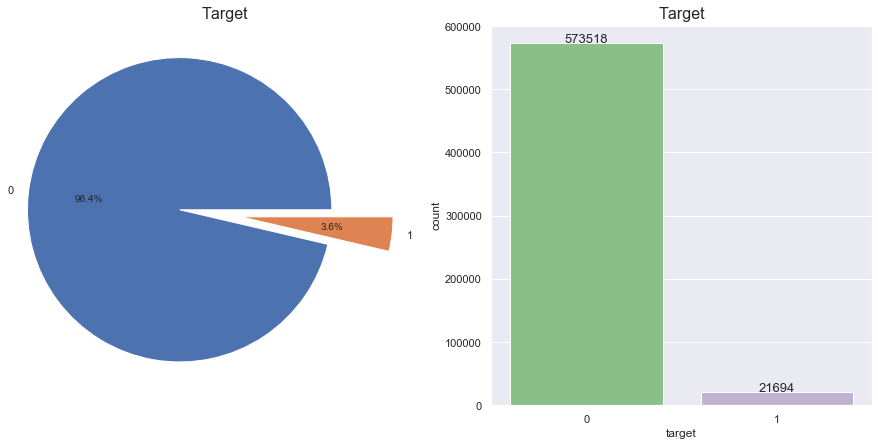

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

df['target'].value_counts().plot.pie(
    explode=[0.3, 0.105], autopct='%1.1f%%', ax=ax[0])

ax[0].set_title('Target', fontsize=16)
ax[0].set_ylabel('')

graph = sns.countplot('target', data=df, ax=ax[1], palette='Accent')
ax[1].set_title('Target', fontsize=16)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center", fontsize=13)
plt.show()

In [16]:
tb = df.target.value_counts()
targ0 = tb[0] / df.shape[0] * 100
targ1 = tb[1] / df.shape[0] * 100
print(f'Unclaimed Insurance: \033[1;32m{round(targ0, 1)} %\033[0m')
print(f'Claimed Insurance: \033[1;31m{round(targ1, 1)} %\033[0m')

Unclaimed Insurance: 96.4 %
Claimed Insurance: 3.6 %


**Inferences:**
- Yes, the classes are heavily imbalanced in the proportion **96.4% to 3.6%**. By having an imbalanced dataframe we are not able to see the true correlations between the target and features.
- The dataset is a **'metric trap'**. Using simpler metrics like accuracy_score can be misleading and hence the metrics must be carefully chosen to evaluate model performance.

## EDA: 3,4 - How many <font color='yellowgreen'>Categorical</font> and <font color='indianred'>Binary</font> Features are there?

In [17]:
bfeat = [c for c in df.columns if c.endswith('bin')]
cfeat = [c for c in df.columns if c.endswith('cat')]

contfeat= [i for i in df.columns if ((i not in bfeat)
                                     and (i not in cfeat) and (i not in ["target", "id"]))]

indfeat = [c for c in contfeat if c.startswith("ps_ind")]
regfeat = [c for c in contfeat if c.startswith("ps_reg")]
carfeat = [c for c in contfeat if c.startswith("ps_car")]
calcfeat = [c for c in contfeat if c.startswith("ps_calc")]

target = ['target']

In [18]:
bina = len(bfeat)
cat = len(cfeat)
cont = len(contfeat)
ind = len(indfeat)
reg = len(regfeat)
car = len(carfeat)
calc = len(calcfeat)

varcounts = pd.DataFrame({'Binary': [bina], 'Categorical': [cat], 'Continuous': [cont]}).T                    
varcounts.rename(columns={0: 'Count'}, inplace=True)
varcounts

,Count
Binary,17
Categorical,14
Continuous,26


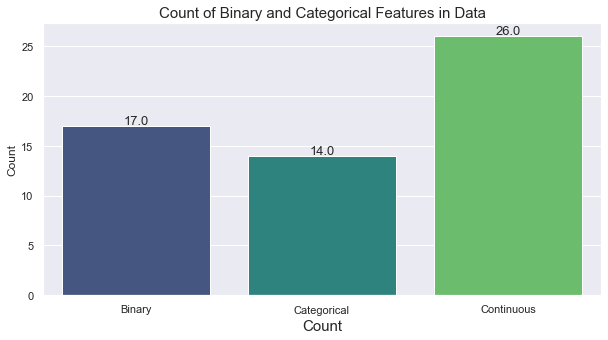

In [19]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Count of Binary and Categorical Features in Data', fontsize=15)
ax1.set_xlabel('Count', fontsize=15)
graph = sns.barplot(varcounts.index, varcounts['Count'], palette='viridis', ax=ax1)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center", fontsize=13)

**Inferences:**
- As per column data, there are **14** Categorical features and **17** Binary Features.

## EDA: 5 -  Write inferences from data on <font color='yellowgreen'>Interval</font> variables.

In [20]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [21]:
contcounts = pd.DataFrame({'Ind': [ind], 'Reg': [reg], 'Car': [car], 'Calc': [calc]}).T                    
contcounts.rename(columns={0: 'Count'}, inplace=True)
contcounts

,Count
Ind,4
Reg,3
Car,5
Calc,14


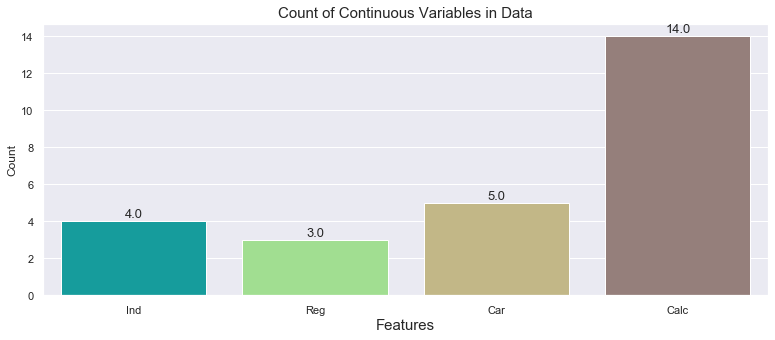

In [22]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_title('Count of Continuous Variables in Data', fontsize=15)
ax1.set_xlabel('Features', fontsize=15)
graph = sns.barplot(contcounts.index, contcounts['Count'], palette='terrain', ax=ax1)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center", fontsize=13)

**Inferences**
- Interval Variables        
    - There a 26 Continuous features present in the dataset. They could be either Nominal, Ordinal or Interval.
    - There is no way to process information on nature of the variables on on the given dataset. 
    - Whether the feature has a **ratio** or frequency or a set **heirarchy** to differentiate between ordinality and nominality is **not possible**.
    - Datatypes of float64 values in continous features can be assumed to be Interval.
    
    

## EDA: 6 -  Write inferences from data on <font color='deepskyblue'>Ordinal</font> variables.

In [23]:
ordinal = []
for i in df.columns:
    if df[i].dtype == 'int64':
        ordinal.append(i)
    if 'bin' in i:
        ordinal.remove(i)

for j in ordinal:
    if j.endswith('cat') and 'car' in j:
        ordinal.remove(j)
ordinal.remove('ps_car_04_cat')
ordinal.remove('ps_car_08_cat')
ordinal.remove('ps_car_11_cat')
ordinal.remove('id')
ordinal.remove('target')

ind = len([c for c in ordinal if c.startswith('ps_ind')])
clc = len([c for c in ordinal if c.startswith('ps_calc')])
C = 0

In [24]:
indcounts = pd.DataFrame({'Ind': [ind], 'Reg': [C], 'Car': [C], 'Calc': [calc]}).T                    
indcounts.rename(columns={0: 'Count'}, inplace=True)
indcounts

,Count
Ind,4
Reg,0
Car,0
Calc,14


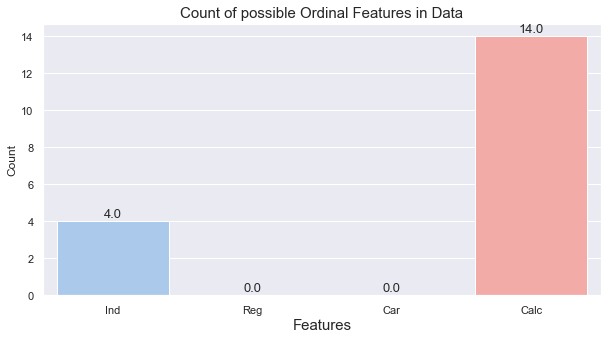

In [25]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel('Features', fontsize=15)
ax1.set_title('Count of possible Ordinal Features in Data', fontsize=15)
graph = sns.barplot(indcounts.index, indcounts['Count'], palette='pastel', ax=ax1)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center", fontsize=13)

**Inferences:**    
- Ordinal Variables
    - There is a designated intrinsic **heirarchy** in ordinal variables. But it is **not possible** to see that heirarchy unless the feature type is known. 
    - The feature type is not mentioned in the data description to recognise its ordinal nature.
    - Datatypes of int64 in continous features can be **assumed** to be Ordinal Variables.
    - If assumed, then there are **15** Ordinal feature, with none in Reg and Car features
    
    
    

## EDA: 7 -  Write inferences from data on <font color='indianred'>Binary</font> variables.

In [26]:
bin_col = [col for col in df.columns if '_bin' in col]
zeros = []
ones = []
for col in bin_col:
    zeros.append((df[col] == 0).sum())
    ones.append((df[col] == 1).sum())

bc = pd.DataFrame(list(zip(bin_col, zeros, ones)), columns=['Bin Col', 'Zeros', 'Ones'])

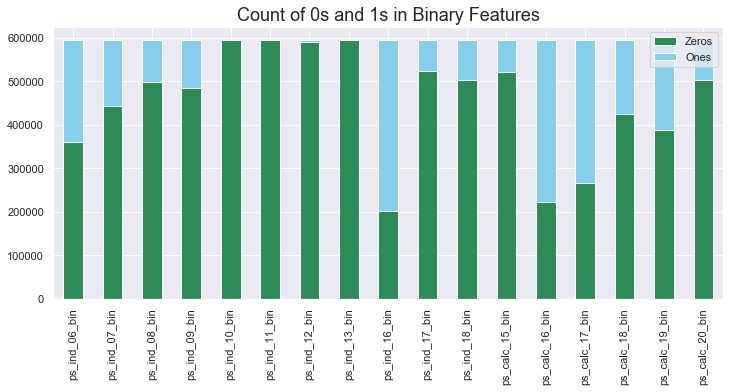

In [27]:
colors = ['seagreen', 'skyblue']
ax1 = bc.plot(kind='bar', stacked=True, figsize=(12,5), color=colors)
ax1.set_title('Count of 0s and 1s in Binary Features', fontsize=18)
ax1.set_xticklabels(bc['Bin Col'])
plt.show()

**Inferences:**
- Binary Variables
    
    - Binary variables have no intrinsic ordering, and only assume values of 0 or 1.
    - There are 17 binary variables present in the dataset.
    - The values are 0 and 1.
    - There are more 0s than 1s in the Bin Dataset, indicating a sparse matrix.
- Many of these are heavily imbalanced. Like **ind10, ind11, ind12, ind13** and should be dropped.

## EDA: 8 - Check if the Target data is <font color='olivedrab'>proportionate</font> or not. (Hint: Below 30% for binary data is sign of imbalance).

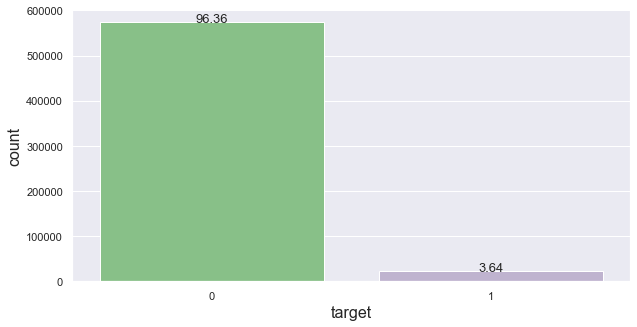

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel('Target Feature', fontsize=16)
plt.ylabel('Observations', fontsize=16)
graph = sns.countplot(df.target, palette='Accent')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, 
               round(height/df.shape[0]*100, 2), ha="center", fontsize=13)

**Inferences:**
- Insurance claimed is 21694 and there are 573518 unclaimed cases.

- Yes, the target feature is heavily imbalanced in the ratio of 96.3% to 3.6% 
which is far lesser than 30%.

## EDA: 9 - What should be the preferred way in this case to <font color='olive'>balance</font> the data?

**Inferences:**
- Claimed Insurance cases are 21694.
- Unclaimed cases are 573518. Hence the data is evidently imbalanced.
- We should attempt to make predictions by using **Resampling** technique. 
100% of the minority class data should be pitched against the majority class
such that the classes get balanced. 
- Since the dataset is very **large**, and minority target class is 3.7% in strength, it could be worthy to choose **Down Sampling** technique for this case.

- However, we will use **SMOTE** technique when training dataset with Multilayer Perceptron Neural Network instead of Resampling the dataset.

## EDA: 10 - How many training <font color='salmon'>records</font> are there after achieving a balance of 12%?

**Inferences:**
- To see training records after achieving a downsampled 88%-12% ratio, we will reduce the majority target class by 12% after deducting the claimed values of 21964.

In [29]:
ct = df.target.value_counts()   # Counts per target feature
print(f'\nTotal Records: {df.shape[0]} | \033[1;32mUnclaimed:\033[0m {ct[0]} | \033[1;31mClaimed:\033[0m {ct[1]}')

tt = df.shape[0] - ct[1]    # Total -(minus) Claimed
uc = np.floor(tt * 0.88).astype(int)   # Total Unclaimed to get 12% Balance.

print(f'\n\033[1;32mTraining Records\033[0m after achieving 12% balance ratio = \033[1;32m{uc}\033[0m')


Total Records: 595212 | Unclaimed: 573518 | Claimed: 21694

Training Records after achieving 12% balance ratio = 504695


## EDA: 11- Which are the <font color='yellowgreen'>top two</font> features in terms of missing values?

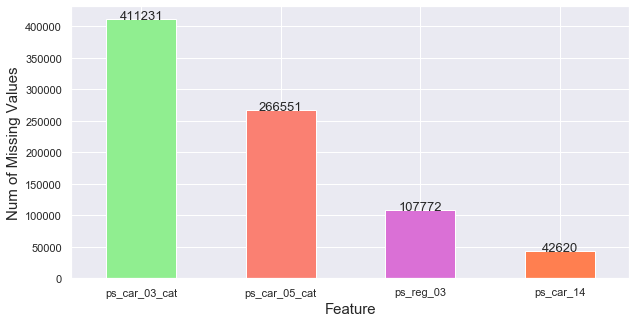

In [30]:
plt.figure(figsize=(10,5))
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Num of Missing Values', fontsize=15)
clr = ['lightgreen', 'salmon', 'orchid', 'coral']
graph = df.isna().sum().sort_values(ascending=False).head(4).plot(kind='bar', rot=0, color=clr)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center", fontsize=13)

**Inferences:**
- ps_car_03_cat and ps_car_05_cat are the top two features with most missing values.

## EDA: 12 - In total, how many features have <font color='indianred'>missing values</font>?

In [31]:
rf = df.isna().sum().sort_values(ascending=False)
print(f'\nThere are \033[1;31m{len(rf[rf.values > 0])}\033[0m features with missing values.')


There are 12 features with missing values.


## EDA: 13 - What steps should be taken to <font color='deepskyblue'>handle</font> the missing data?

**Steps:**
- As a rule of thumb, features with missing values greater than 5% should be dropped.
- Imputations can be done with following rules:
    - Interval / Continuous variables with less than 5% missing values can be imputed by their Means.
    - Categorical variables with less than 5% missing values can be imputed by their Modes.
    - Ordinal variables with less than 5% missing values can be imputed by their Medians.
- Columns with equal number of values as total observation should be dropped. (Ex. ID)
- Columns with one unique value must be dropped. (Useless information)
- Categorical columns with high cardinality (too many unique values) should be dropped.
- However, our dataset is too large to inject artificial data via imputations. Hence we can drop na values safely and still retain a large number of records.

#### Feature Removal and Optimization

In [32]:
# Dropping columns with missing values larger than 5%.
to_drop = list(df.isna().sum().sort_values(ascending=False).head(4).index)

# Dropping missing values instead of injecting artifical data via imputations.
df.drop(to_drop, inplace=True, axis=1)
df.dropna(inplace=True)
df.drop('id', axis=1, inplace=True)  # Removing ID column.

print(f'\n\033[1;31mColumns dropped:\033[0m {to_drop}')
print(f'\n\033[1;32mShape after Cleaning Data:\033[0m {df.shape}')


Columns dropped: ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03', 'ps_car_14']

Shape after Cleaning Data: (582852, 54)


## EDA: 14, 15 - Which Interval variables have strong <font color='cadetblue'>correlation</font>? Whats the level of coordination among Ordinal features?

In [33]:
carfeat.remove('ps_car_14')   # Since these have been dropped earlier, we should drop them from our list as well.
regfeat.remove('ps_reg_03')

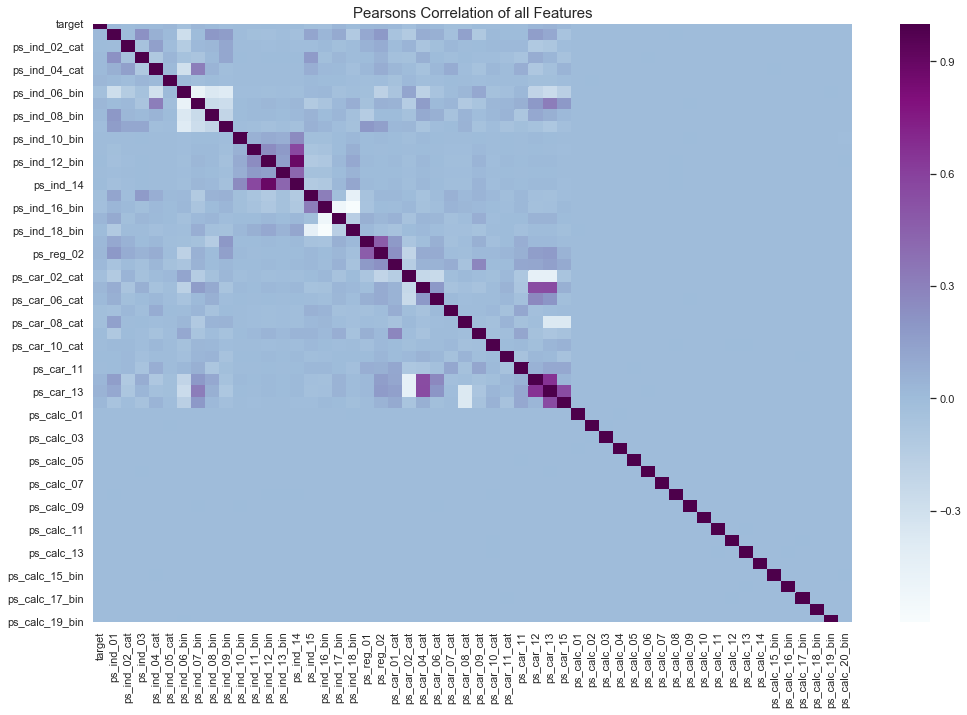

In [34]:
plt.figure(figsize=(17,11))
sns.heatmap(df.corr(), cmap='BuPu')            # 8 seconds
plt.title('Pearsons Correlation of all Features', fontsize=15)
plt.show()

**Inferences:**
- The heatmap above shows the correlation between all the features with one another.
- All of the vastly expansive light blue marks an area of no correlation. 
    - Mainly marked by calc features, which exhibit **purposelessness**.
    - Binary features are also visualized in the plain blue zone. 
    - But since Binary values only have 0s and 1s, they can't be used to show any correlation, yet can't be flagged to drop.

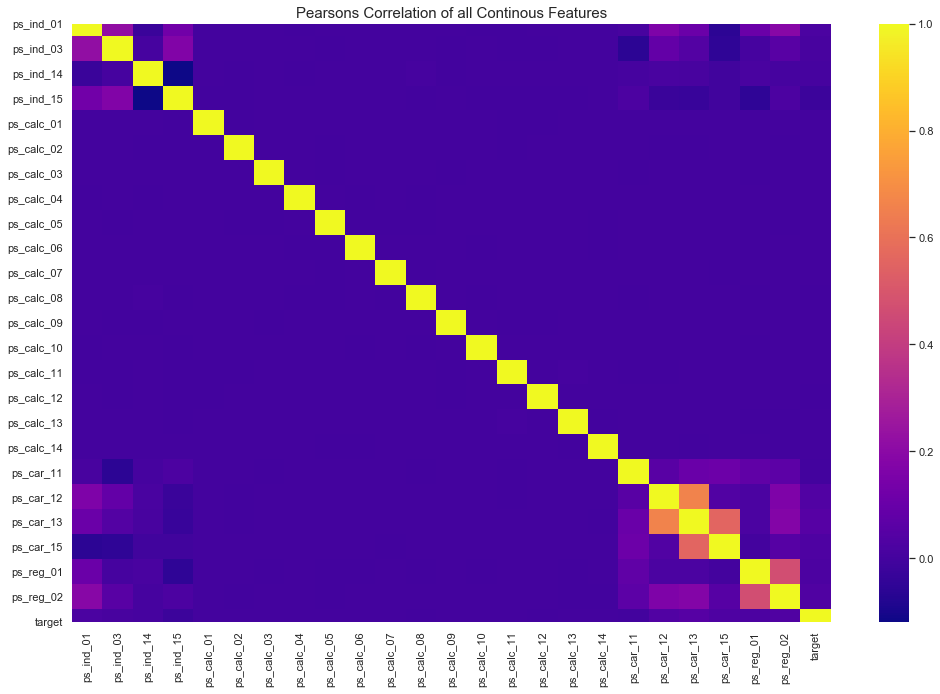

In [35]:
plt.figure(figsize=(17,11))
sns.heatmap(df[indfeat + calcfeat + carfeat + regfeat + target].corr(), cmap='plasma')
plt.title('Pearsons Correlation of all Continous Features', fontsize=15)
plt.show()

**Inferences:**
- Calc features seem to have not much effect on each other and carry very low correlation.
    - Hence **calc features** will be **dropped** from the dataset.

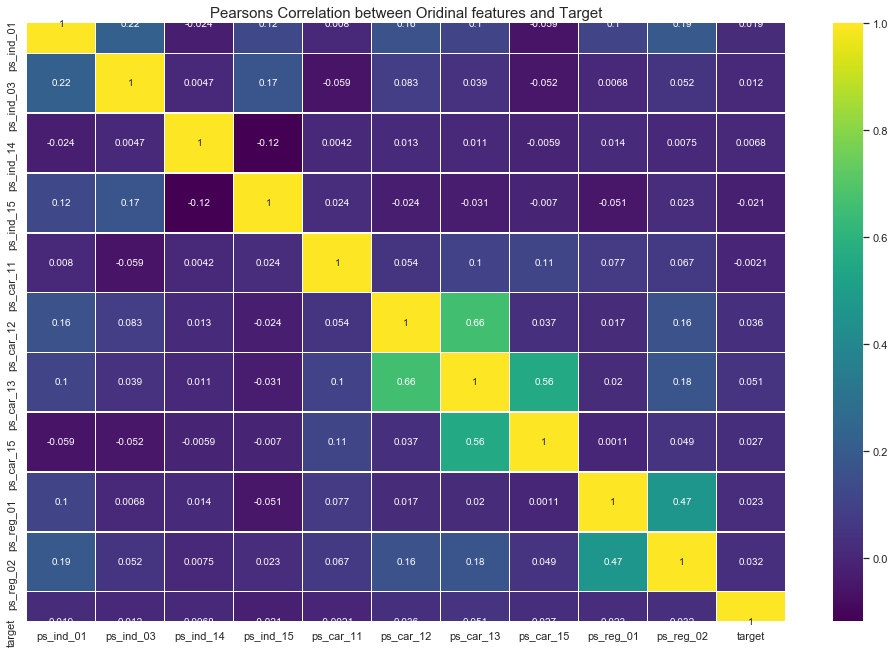

In [36]:
plt.figure(figsize=(17,11))
sns.heatmap(df[indfeat + carfeat + regfeat + target].corr(), 
            linewidth=0.5, cmap='viridis', annot=True)
plt.title('Pearsons Correlation between Oridinal features and Target', fontsize=15)
plt.show()

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 
- ps_car_12 and ps_car13 
- ps_car_12 and ps_car14 
- ps_car_13 and ps_car15 

We can plot a regression plot to check linearity between Features with high correlation below.

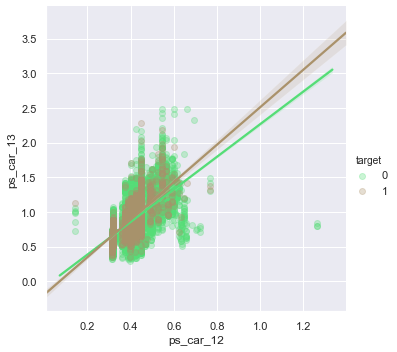

In [58]:
s = df.sample(frac=0.1)
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', 
           palette='terrain', scatter_kws={'alpha':0.3})

plt.show()           # 5s

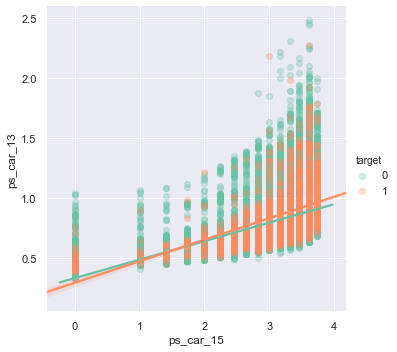

In [52]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', 
           palette='Set2', scatter_kws={'alpha':0.3})

plt.show()         # 5s

#### More Feature Optimization and Removal

In [59]:
df.drop(calcfeat, axis=1, inplace=True)

**Inferences:**
- Ordinal features with lighter shades hold strong correlation with other ordinal features.
- Due barely any correlation found between **calcfeatures**, it is advisable to **remove** the features to lessen the curse of dimensionality.
- The feature **'ps_car_11_cat'** could also be removed as it exhibited high cardinality in terms of unique values (104) as a categorical variable, but we will keep it as it will not effect the F1 Score later.
    - If **ps_car_11_cat** could be **label encoded** instead of One Hot Encoded, it would reduce the amounts of Features created after one hot encoding as it has **104** unique values.
    - This feature doesnt give us any information about its ordinality, hence **label encoding** is advisable.

## EDA: 16 - Implement <font color='deepskyblue'>One Hot</font> Encoding for categorical features.


In [60]:
# Converting to type Object for categorical features.
for i in df.columns:
    if 'cat' in i:
        df[i] = df[i].astype(str)

dfz = df.copy()    # dfz will goto Downsampling   # 4s

#### ONE HOT ENCODING

In [61]:
df0 = df.copy()      # For checking Scores without OHE later during modelling
df0.shape

(582852, 40)

In [62]:
df = pd.get_dummies(df, drop_first=True)
print(f'\n\033[1;33mDataset before One Hot Encoding:\033[0m \033[1;30;43m{dfz.shape}\033[0m')
print(f'\n\033[1;34mDataset after One Hot Encoding:\033[0m \033[1;30;44m{df.shape}\033[0m')


Dataset before One Hot Encoding: (582852, 40)

Dataset after One Hot Encoding: (582852, 187)


## EDA: 17 - In Nominal and Interval features, which features are suitable for <font color='orangered'>Standard Scaler?</font>

#### TRAIN TEST SPLIT 

In [63]:
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, random_state=22)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((524566, 186), (524566,), (58286, 186), (58286,))

#### DATA PREPROCESSING

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Inferences:**
- Due to lack of any **important information** in **Calc** features, they were **dropped**.
- Binary features are 0s and 1s and hence **won't be effected** by Scaling.
- Categorical features will be scaled.
- Continous float and integer features will need scaling.
- Hence, it is safe to scale the **entire dataset** in one go.

### EDA: 18 -  Summarize the learnings of <font color='coral'>EDA.</font>

###### **SUMMARY:**

- The dataset is available with **97.6%** integrity. Remaining data was missing.
- The Dataset has 59 features and 595,212 observations.


- There are 17 binary variables present in the dataset.
- There are more 0s than 1s in the Bin Dataset, indicating a **sparse matrix** of binary features.
- Many of the binary features are heavily imbalanced. Like ind10, ind11, ind12, ind13 and should be dropped.


- Cases of Claimed insurance is **21,694** and there are **5,73,518** unclaimed cases.


- The Claimed Feature feature is heavily imbalanced in the ratio of **96.3%** to **3.6%**.


- We should attempt to make predictions by using Resampling technique. 
    - 100% of the minority class data should be pitched against the majority class such that the classes get balanced.
    - **SMOTE** should be used with **Neural Network** classifiers.


- Since the dataset is very large, and minority target class is 3.7% in strength, it could be worthy to choose Down Sampling technique for this case.


- Training dataset is too large to inject artificial data via imputations. Hence we can **drop** na values safely and still **retain a large number of records**.


- Most **calc features** exhibit purposelessness.


- Due barely any correlation found between calcfeatures, it is advisable to remove the features to lessen the curse of dimensionality.
- If ps_car_11_cat could be label encoded instead of One Hot Encoded, it would reduce the amounts of Features created after one hot encoding as it has 104 unique values.
- The feature 'ps_car_11_cat', doesnt give us any information about its ordinality, hence label encoding is **advisable** instead of One Hot Encoding. However, since the questionnaire asks for OHE, we will continue with both.

# <font color='dodgerblue'>MODELLING</font> / MODEL DEVELOPMENT

#### <font color='indianred'>DOWNSAMPLING</font> THE DATAFRAME TO BUILD MODEL

In [65]:
claim1 = dfz.loc[dfz['target'] == 1]            # Keep minority datasize Constant
claim0 = dfz.loc[dfz['target'] == 0][:20742]    # Downsample to match minority

ndf = pd.concat([claim0, claim1])
dfx = ndf.sample(frac=1, random_state=42)       # Shuffle df.

dfx.head()                                      # dfx = Undersampled Dataset.

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_15,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
312892,1,1,1.0,3,0.0,0.0,0,1,0,0,0,0,0,0,0,2,1,0,0,0.0,1.8,9.0,0,1,13,1.0,0,2.0,1,104,2.0,0.447214,1.225571,3.741657,0,0,1,0,1,0
12080,0,2,1.0,11,0.0,0.0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.6,0.7,10.0,0,0,10,1.0,1,0.0,1,28,3.0,0.374166,0.928898,3.162278,0,1,0,0,0,0
5159,1,1,1.0,2,1.0,0.0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.8,0.2,5.0,1,0,6,0.0,1,2.0,1,26,3.0,0.374166,0.635096,2.645751,0,0,1,1,0,1
5495,0,2,1.0,2,1.0,0.0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.3,0.4,6.0,1,0,11,1.0,1,0.0,1,16,3.0,0.374166,0.719317,3.316625,0,0,1,1,1,0
228665,1,0,2.0,3,1.0,0.0,0,1,0,0,0,0,0,0,0,5,0,0,1,0.9,1.3,11.0,0,0,7,1.0,0,2.0,1,104,3.0,0.400000,1.082066,3.605551,0,1,1,0,1,1


In [66]:
claim0.shape, claim1.shape

((20742, 40), (20742, 40))

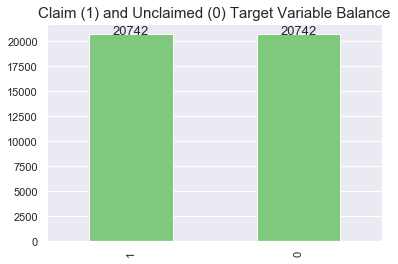

In [67]:
plt.title('Claim (1) and Unclaimed (0) Target Variable Balance', fontsize=15)
graph = dfx.target.value_counts().plot(kind='bar', cmap='Accent')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha="center", fontsize=13)

 **Inferences:**
 - Keeping the Minority size constant, the data was **sliced** from its original strength down to the size of Minority target class in a **50-50** ratio.
 - The graph shows that both the 'Claimed' and 'Unclaimed' classes are now **well balanced**.

#### PREPARING TRAINING DATA FOR <font color='goldenrod'>UNDERSAMPLED</font> DATASET

In [68]:
dfx = pd.get_dummies(dfx, drop_first=True)
dfx.shape

(41484, 187)

In [69]:
U = dfx.drop('target', axis=1)
v = dfx.target

U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.2, random_state=22)

scaler = StandardScaler()
U_train = scaler.fit_transform(U_train)
U_test = scaler.fit_transform(U_test)

U_train.shape, v_train.shape, U_test.shape, v_test.shape

((33187, 186), (33187,), (8297, 186), (8297,))

## MODELLING: 1 - The Simple <font color='yellowgreen'>LogReg Model</font> seems to have<font color='coral'> high accuracy.</font> Is that what we need at all? What is the problem with this model?

In [70]:
lg = LogisticRegression()

#### FITTING ON ORIGINAL (IMBALANCED) DATASET


		Classification Report


,precision,recall,f1-score,support
0,0.965,1.000,0.982,56221.000
1,0.000,0.000,0.000,2065.000
accuracy,0.965,0.965,0.965,0.965
macro avg,0.482,0.500,0.491,58286.000
weighted avg,0.930,0.965,0.947,58286.000



Accuracy: 96.0%
Precision Score: 0.0 | Recall Score: 0.0
F1 Score: 0.0	| ROC Score: 0.5

Confusion Matrix: 
[[56221     0]
 [ 2065     0]]


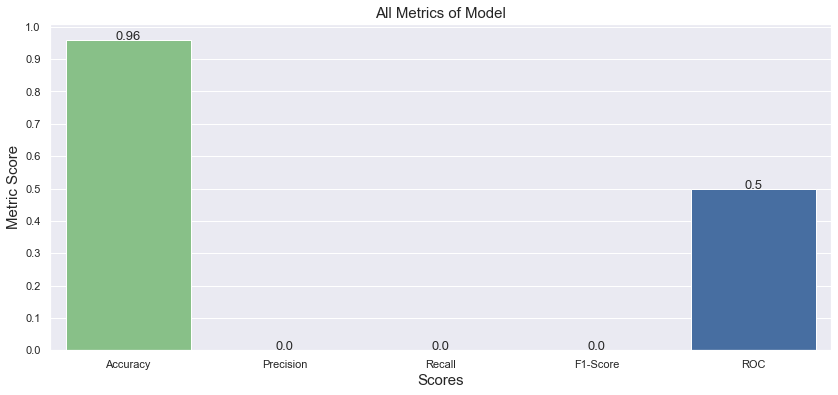

In [71]:
pr, re, f1, ac1 = run_classifier(X_train, y_train, X_test, y_test, lg)             # 12 seconds

 **Inferences:**
- Logistic Regression model seems to be returning a very good accuracy score of 96.4%.
- However it has a nil correctness in classification of the minority target class as shown by the 0.0 F1-Score.
- This is due to the poor ability of the Classifier to classify the Minority target class.

## MODELLING: 2 - Why do you think is the F1 score <font color='red'>0.0?</font>

 **Inferences:**
- The F1 score is 0.0 of the Claimed class because the Model is **heavily imbalanced**.
- The model is not able to correctly classify datapoints comprising of the **Minority Class**.
- The model without any evaluation needed has a 96.3% 'default accuracy' as they are truth values anyway. 
- Hence the model is having an **inherent 96.3%** probability to **incorrectly** classify datapoints. 
- F1 = 2 * (Precision * Recall) / (Precision + Recall)
- The F1 score is the weighted average of the Precision and Recall. The model has 0.0 Recall, hence the F1 Score is 0.

## MODELLING: 3 - What is the <font color='tomato'>Precision</font> and <font color='goldenrod'>Recall</font> Score of the Model?

In [72]:
p = []
r = []

print(f'Precision: {pr}')
print(f'Recall: {re}')

p.append(pr)
r.append(re)

Precision: 0.0
Recall: 0.0


## MODELLING: 4 - What is the most <font color='goldenrod'>important</font> inference you can draw from the Model?

 **Inferences:**
- The most important inference that can be drawn from this model is that despite 
the high training accuracy of the model, the actual model performance is terribly below par.
- The model **cannot** be used for predictions and is undeployable because **Class Imbalance** problem has not been addressed.

## MODELLING: 5 - What is the Accuracy score and F1 score for the <font color='goldenrod'>improved</font> Logistic Regression Model?

#### FITTING ON DOWNSAMPLED DATAFRAME


		Classification Report


,precision,recall,f1-score,support
0,0.582,0.608,0.595,4160.000
1,0.587,0.561,0.574,4137.000
accuracy,0.585,0.585,0.585,0.585
macro avg,0.585,0.584,0.584,8297.000
weighted avg,0.585,0.585,0.584,8297.000



Accuracy: 58.0%
Precision Score: 0.587 | Recall Score: 0.561
F1 Score: 0.574	| ROC Score: 0.584

Confusion Matrix: 
[[2531 1629]
 [1818 2319]]


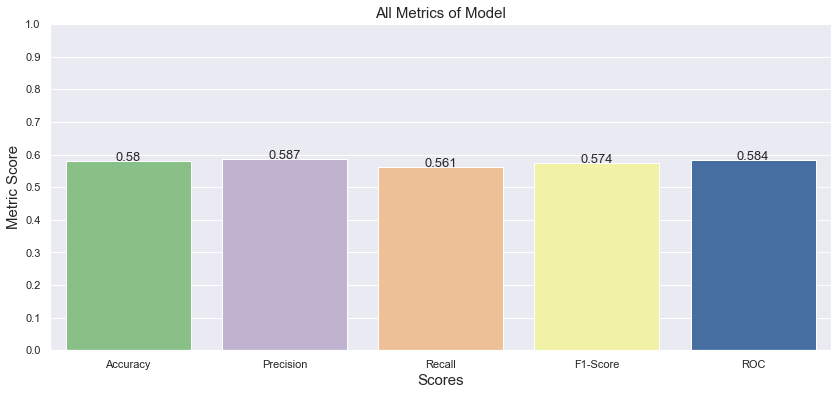

In [73]:
lg1 = LogisticRegression(class_weight='balanced', C=0.003)
pr2, re2, f2, ac2 = run_classifier(U_train, v_train, U_test, v_test, lg1)

 **Inferences:**
- The above map shows the F1-score and the Accuracy Scores to be well above 0.0.

TESTING SAME MODEL ON DATASET **WITHOUT** ONE HOT ENCODING


		Classification Report


,precision,recall,f1-score,support
0,0.974,0.618,0.756,56221.000
1,0.050,0.551,0.092,2065.000
accuracy,0.615,0.615,0.615,0.615
macro avg,0.512,0.584,0.424,58286.000
weighted avg,0.941,0.615,0.732,58286.000



Accuracy: 62.0%
Precision Score: 0.05 | Recall Score: 0.551
F1 Score: 0.092	| ROC Score: 0.584

Confusion Matrix: 
[[34717 21504]
 [  928  1137]]


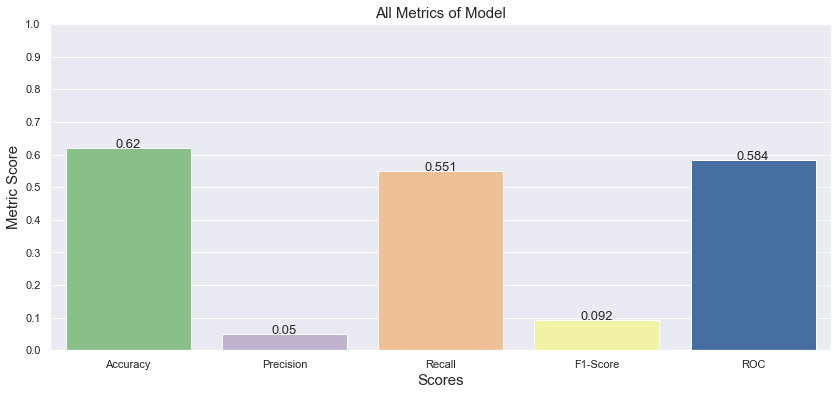

In [74]:
M = df0.drop('target', axis=1)
n = df0.target
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.1, random_state=22)
cre, pre, ree, fe = run_classifier(M_train, n_train, M_test, n_test, lg1)         # 13s

## MODELLING: 6 - Why do you think F1 score has <font color='yellowgreen'>improved?</font>

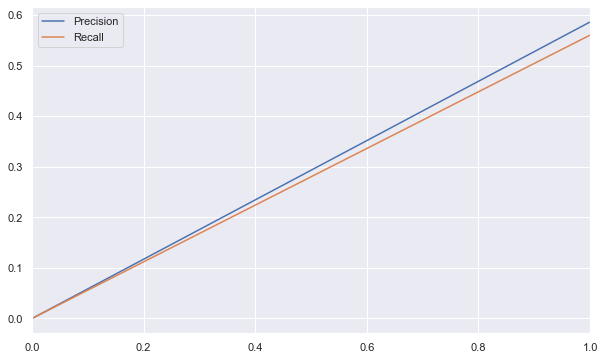

In [75]:
p.append(pr2)
r.append(re2)
pr = pd.DataFrame(list(zip(p, r)), columns=['Precision', 'Recall'])
pr.plot(kind='line', figsize=(10,6))

 **Inferences:**
- The Machine learnt the differences and patterns after downsampling the dataset somewhat better than earlier. 
- While the accuracy dropped, the F1-score in the minority predicted class rose significantly.
- The F1 score improves as Precision and Recall improve from the previous 0.0 to around 0.55.

## MODELLING: 7 - For model <font color='Orange'>LinearSVC</font> play with parameters - dual, max_iter and see if there is any improvement.

In [76]:
lc = LinearSVC()

In [77]:
sc = StandardScaler()
Ux_train = sc.fit_transform(U_train)
Ux_test = sc.transform(U_test)


		Classification Report


,precision,recall,f1-score,support
0,0.581,0.611,0.596,4160.000
1,0.587,0.558,0.572,4137.000
accuracy,0.584,0.584,0.584,0.584
macro avg,0.584,0.584,0.584,8297.000
weighted avg,0.584,0.584,0.584,8297.000



Accuracy: 58.0%
Precision Score: 0.587 | Recall Score: 0.558
F1 Score: 0.572	| ROC Score: 0.584

Confusion Matrix: 
[[2540 1620]
 [1830 2307]]


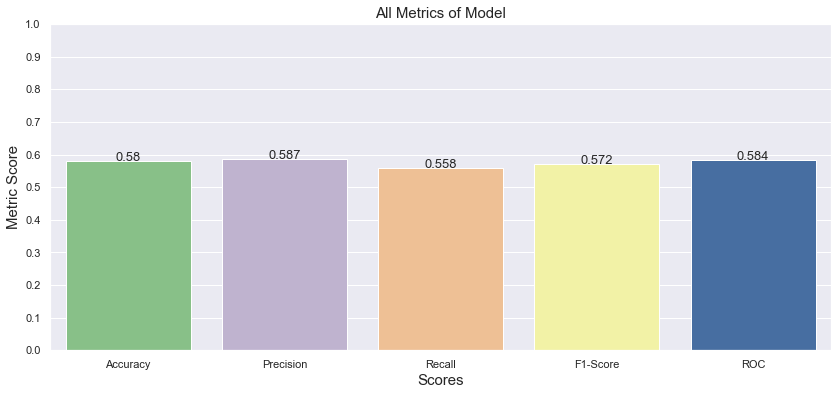

In [78]:
pr3, re3, f3, ac3 = run_classifier(Ux_train, v_train, Ux_test, v_test, lc)              # 24 seconds

In [79]:
from sklearn.ensemble import RandomForestClassifier                       # 22 seconds
tuners = [{'max_iter': [2, 3, 4, 5, 6, 7]}]
clf = GridSearchCV(estimator=LinearSVC(dual=False),
                   param_grid=tuners, n_jobs=-1, scoring='f1')

clf.fit(U_train, v_train)

print(f'\033[1;30mBest F1 Score:\033[0m {round(clf.best_score_, 3)}')
print(f'\033[1;30mBest Max Iter:\033[0m', clf.best_estimator_.max_iter)

Best F1 Score: 0.578
Best Max Iter: 4



		Classification Report


,precision,recall,f1-score,support
0,0.583,0.613,0.597,4160.000
1,0.589,0.559,0.574,4137.000
accuracy,0.586,0.586,0.586,0.586
macro avg,0.586,0.586,0.586,8297.000
weighted avg,0.586,0.586,0.586,8297.000



Accuracy: 59.0%
Precision Score: 0.589 | Recall Score: 0.559
F1 Score: 0.574	| ROC Score: 0.586

Confusion Matrix: 
[[2550 1610]
 [1826 2311]]


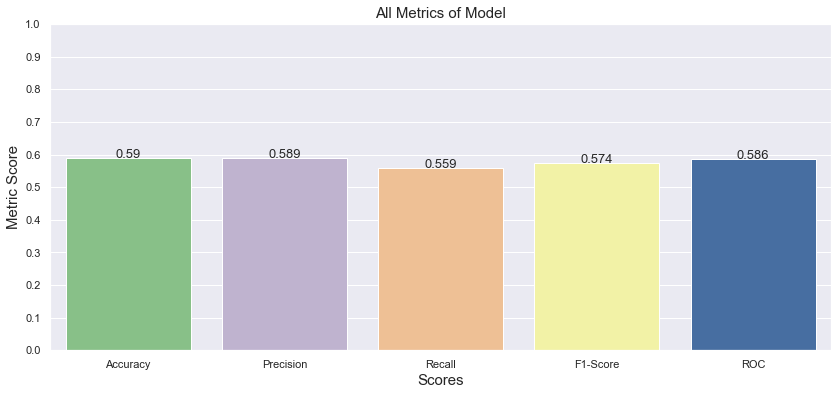

In [80]:
pr31, re31, f31, ac31 = run_classifier(Ux_train, v_train, Ux_test, v_test, clf)           # 20 seconds

 **Inferences:**
- A very marginal improvement in F1-Score is recorded by using LinearSVC

## MODELLING: 8 - SVC with imbalance check and feature optimization and only <font color='yellowgreen'>100k records</font>. Is there any improvement in scores?

#### Imbalance Check and 100k Records

- A widely adopted technique for dealing with highly unbalanced datasets is called **Resampling**. 
- It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

In [81]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.target == 0]
df_minority = df[df.target == 1]
df_majority = df_majority[:50000] 

# Upsample minority class 'minu'
minu = resample(df_minority, replace=True, n_samples=50000, random_state=42) 
 
# Combine majority class with upsampled minority class
dfu = pd.concat([df_majority, minu]) 
dfu.target.value_counts()    # Balanced

1    50000
0    50000
Name: target, dtype: int64

In [82]:
dfu.shape

(100000, 187)

In [83]:
A = dfu.drop('target', axis=1)
b = dfu.target
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [84]:
A_train.shape, A_test.shape

((80000, 186), (20000, 186))


		Classification Report


,precision,recall,f1-score,support
0,0.594,0.604,0.599,10035.000
1,0.594,0.583,0.589,9965.000
accuracy,0.594,0.594,0.594,0.594
macro avg,0.594,0.594,0.594,20000.000
weighted avg,0.594,0.594,0.594,20000.000



Accuracy: 59.0%
Precision Score: 0.594 | Recall Score: 0.583
F1 Score: 0.589	| ROC Score: 0.594

Confusion Matrix: 
[[6062 3973]
 [4151 5814]]


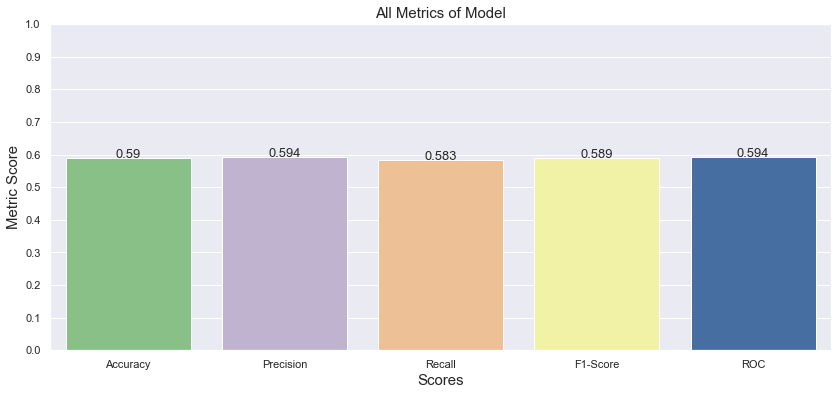

In [85]:
pr4, re4, f4, ac4 = run_classifier(A_train, b_train, A_test, b_test, lc)           # 24 seconds

 **Inferences:**
- An **overall improvement** has been noted in the metrics after balancing and upsampling to 100k records.
- Stability has been observed in Precision and Recall as compared to earlier models.
- Despite the advantage of balancing classes, these techniques also have their weaknesses. 
    - The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. 
    - In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

## MODELLING: 9 - <font color='deepskyblue'>XGBoost</font> is one of the better classifiers but still F1-Score is very <font color='coral'>low</font>. What could be the reason?

In [86]:
xg = XGBClassifier(scale_pos_weight=1)


		Classification Report


,precision,recall,f1-score,support
0,0.600,0.621,0.610,10035.000
1,0.605,0.584,0.594,9965.000
accuracy,0.602,0.602,0.602,0.602
macro avg,0.603,0.602,0.602,20000.000
weighted avg,0.603,0.602,0.602,20000.000



Accuracy: 60.0%
Precision Score: 0.605 | Recall Score: 0.584
F1 Score: 0.594	| ROC Score: 0.602

Confusion Matrix: 
[[6228 3807]
 [4144 5821]]


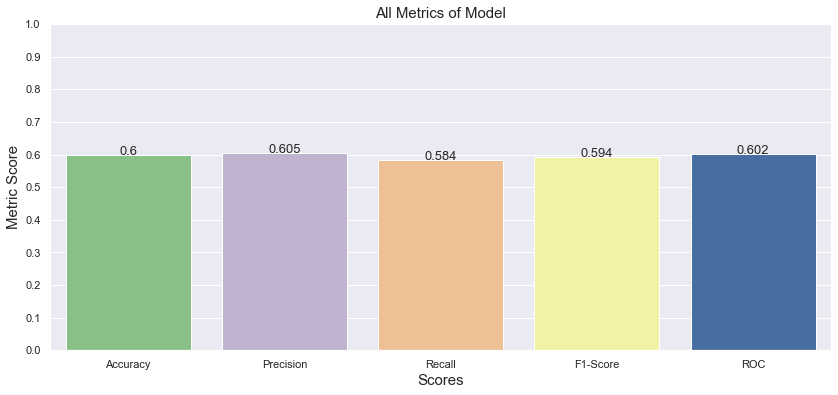

In [87]:
pr5, re5, f5, ac5 = run_classifier(A_train, b_train, A_test, b_test, xg)          # 50 seconds

 **Inferences:**
- XGBoost still shows improvement over the previous SVC classifier. The ROC score also has evidently improved.
- We observe the Accuracy and F1 steadiy increasing from 0.58 to 0.60 as we change to better models.
- The F1-score still remains relatively low with scale_pos_weight set to higher than 1.
    - The Recall became 100% and the accuracy took a nose dive at scale_pos_weight set to higher than 1.
    - The Model was generating many false positives with a 100% Recall.
    - Hence the F1 Score remained low.
- Much better scores were achieved with scale_pos_weight set to 1.

## MODELLING: 10 - What is the <font color='violet'>increase</font> in the number of features after One Hot Encoding?

 **Inferences:**
- One Hot Encoding increased the number of features from **53 to 187** as exhibited above in Kernel 62.

## MODELLING: 11 - Is there any <font color='yellowgreen'>improvement</font> in the scores after encoding?

The Precision **increased** with One Hot Encoding as tested above. Below are the scores **without OHE** of training features.

- Accuracy: 62.0%
- Precision Score: 0.05 
- Recall Score: 0.551
- F1 Score: 0.092
- ROC Score: 0.584

The Scores below are **after running OHE** of the training dataset:

- Accuracy: 58.0%
- Precision Score: 0.587 
- Recall Score: 0.561
- F1 Score: 0.574	
- ROC Score: 0.584

Clearly the scoring pattern is **more acceptable after One Hot Encoding** the features.

## MODELLING: 12 - If not missign a positive sample is the priority, which model is best so far? 


- By this question, it could be inferred that the ML algorithm being sought as the best performer is the one that returns maximum True Positives.
- Hence **if not missing a positive sample is the priority**, **MLPClassifier** is the best model evidently computed below.
- See final summary table at the end of file.

## MODELLING: 13 - If not marking negative sample as positive is top priority, which model is best so far?

- By this question, it could be inferred that the ML algorithm being sought as the best performer is the one that returns maximum False Positives.
- Hence **if not marking negative sample as positive is the priority**, **XGBoost Classifier** is the best model as computed below.
- See final summary table at the end of file.

## MODELLING: 14 - Do you think using <font color='yellowgreen'>AdaBoost</font> can give any significant <font color='violet'>improvement</font> over XGBoost?

In [88]:
ad = AdaBoostClassifier(base_estimator=RandomForestClassifier())

**AdaBoost** combines multiple 'weak classifiers' into a single 'strong classifier. In our case, we use the weak classifier of the random forest and 'adaptive boost' and observe the results.


		Classification Report


,precision,recall,f1-score,support
0,0.882,0.914,0.897,10035.000
1,0.910,0.876,0.893,9965.000
accuracy,0.895,0.895,0.895,0.895
macro avg,0.896,0.895,0.895,20000.000
weighted avg,0.896,0.895,0.895,20000.000



Accuracy: 90.0%
Precision Score: 0.91 | Recall Score: 0.876
F1 Score: 0.893	| ROC Score: 0.895

Confusion Matrix: 
[[9171  864]
 [1232 8733]]


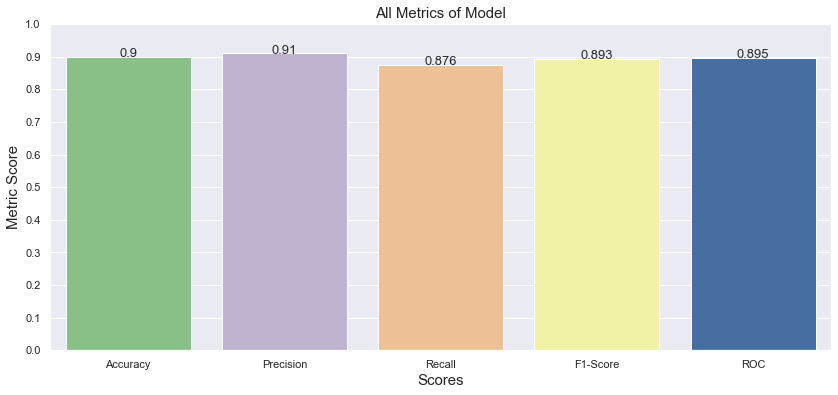

In [89]:
pr6, re6, f6, ac6 = run_classifier(A_train, b_train, A_test, b_test, ad)          # 31 seconds

 **Inferences:**
- **Yes**, AdaBoost with base estimator of RandomForest made the model performance **improve drastically** over all the previous Models. 

## MODELLING: 15 - <font color='dodgerblue'>MLPClassifier</font> is the <font color='indianred'>Neural Network</font> we are trying. But how to choose the right number of layers and size?

#### SMOTE ANALYSIS

Using TensorFlow backend.


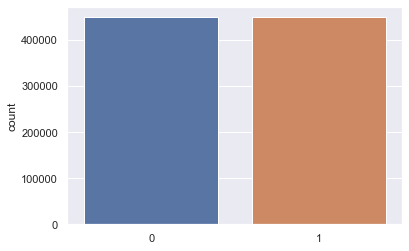

In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain, ytrain = sm.fit_sample(X_train, y_train.ravel())
sns.countplot(ytrain)                                                     # 40s

In [91]:
Xtrain.shape, ytrain.shape

((899456, 186), (899456,))

In [92]:
lc = LinearSVC()

Xtrain = pd.DataFrame(Xtrain)
ytrain = pd.DataFrame(ytrain)

Xtrain.shape, ytrain.shape

((899456, 186), (899456, 1))

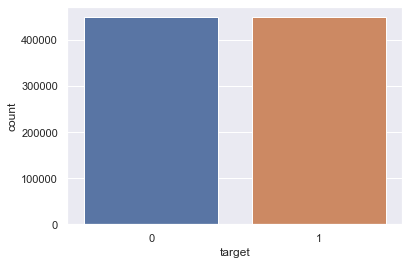

In [93]:
df1 = pd.concat([Xtrain, ytrain], axis=1)
df1.rename(columns={0: 'target'}, inplace=True)
sns.countplot(df1['target'])

In [94]:
X = df1.drop('target', axis=1)
y = df1.target

smX_train, smX_test, smy_train, smy_test = train_test_split(X, y, 
                                                            test_size=0.2, 
                                                            random_state=42)

In [95]:
ml = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=30,
                     solver='adam', verbose=True  )

Iteration 1, loss = 0.20534474
Iteration 2, loss = 0.16872913
Iteration 3, loss = 0.16125886
Iteration 4, loss = 0.15670228
Iteration 5, loss = 0.15344496
Iteration 6, loss = 0.15064266
Iteration 7, loss = 0.14829494
Iteration 8, loss = 0.14602811
Iteration 9, loss = 0.14403778
Iteration 10, loss = 0.14261169
Iteration 11, loss = 0.14102078
Iteration 12, loss = 0.13940922
Iteration 13, loss = 0.13828311
Iteration 14, loss = 0.13697948
Iteration 15, loss = 0.13565562
Iteration 16, loss = 0.13435107
Iteration 17, loss = 0.13346044
Iteration 18, loss = 0.13263795
Iteration 19, loss = 0.13183236
Iteration 20, loss = 0.13099686
Iteration 21, loss = 0.12994434
Iteration 22, loss = 0.12926932
Iteration 23, loss = 0.12865211
Iteration 24, loss = 0.12797685
Iteration 25, loss = 0.12723780
Iteration 26, loss = 0.12690134
Iteration 27, loss = 0.12625064
Iteration 28, loss = 0.12575935
Iteration 29, loss = 0.12557859
Iteration 30, loss = 0.12519020

		Classification Report


,precision,recall,f1-score,support
0,0.932,0.982,0.956,89990.000
1,0.981,0.928,0.954,89902.000
accuracy,0.955,0.955,0.955,0.955
macro avg,0.956,0.955,0.955,179892.000
weighted avg,0.956,0.955,0.955,179892.000



Accuracy: 96.0%
Precision Score: 0.981 | Recall Score: 0.928
F1 Score: 0.954	| ROC Score: 0.955

Confusion Matrix: 
[[88365  1625]
 [ 6440 83462]]


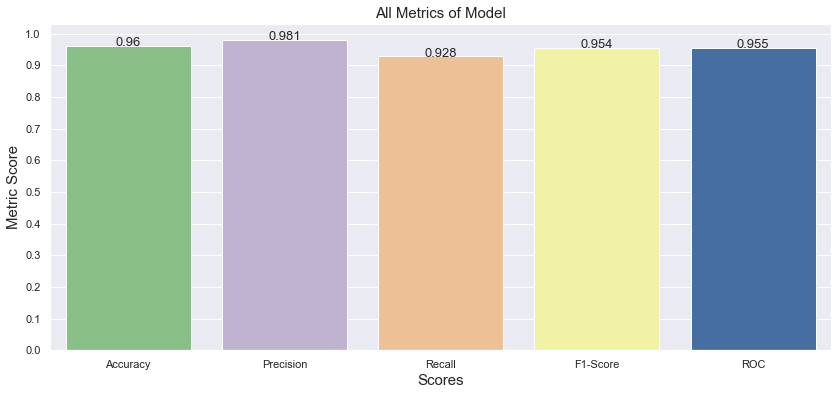

In [96]:
pr7, re7, f7, ac7 = run_classifier(smX_train, smy_train, smX_test, smy_test, ml)     #8m 50s

## MODELLING: 16 - At what <font color='royalblue'>layer size</font> do we get the best F1-Score?

 **Inferences:**
- The model was tested with hidden_layer_sizes=(32,32,32), (100, 100), (64,128,64), (512, 256, 128), (512, 256), (512) and (200) neuron units.
- The best F1 score was achieved at Hidden Layers with **200 Neurons**. 
- Testing with more than 200 neurons in deep network took long to train and scores were similar, **hence 200 was chosen**.
- Increasing number of hidden layers proved useful when running MLPCLassifier on Resampled data. 
    - However, scoring became redundant after SMOTE and a requirement of deep network was not needed as the scores were similar each time.
- Outcome of Multilayer Perceptron along with operating SMOTE on imbalanced dataset gave an outstanding performance as compared to all the previous methods used.

# <font color='indianred'>FINAL SUMMARY</font> TABLE 

,Imbalanced LogReg,Improved LogReg,LinearSVC,GridSearchSVC,LinearSVC100k,XGBoost,AdaBoosting (RR),MLP Neural Network
Accuracy,0.96,0.58,0.58,0.59,0.59,0.6,0.9,0.96
F1Score,0,0.574,0.572,0.574,0.589,0.594,0.893,0.954
Precision,0,0.587,0.587,0.589,0.594,0.605,0.91,0.981
Recall,0,0.561,0.558,0.559,0.583,0.584,0.876,0.928


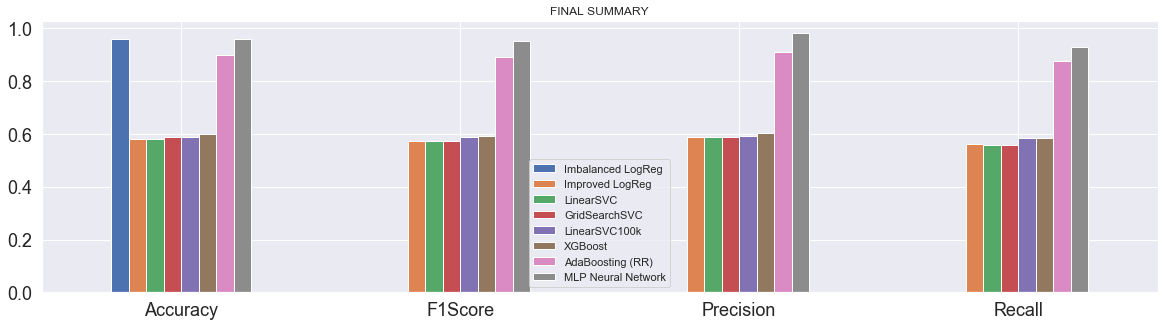

In [97]:
fdf = pd.DataFrame({'Accuracy':[ac1, ac2, ac3, ac31, ac4, ac5, ac6, ac7],      # Final Dataframe fdf
                    'F1Score': [f1, f2, f3, f31, f4, f5, f6, f7],
                   'Precision': [0, pr2, pr3, pr31, pr4, pr5, pr6, pr7], 
                    'Recall': [re, re2, re3, re31, re4, re5, re6, re7]}).T

fdf.rename(columns={0: 'Imbalanced LogReg', 1: 'Improved LogReg', 
                    2:'LinearSVC', 3: 'GridSearchSVC',
                    4: 'LinearSVC100k', 5: 'XGBoost', 
                    6: 'AdaBoosting (RR)', 7: 'MLP Neural Network'}, inplace=True)


fdf.plot(kind='bar', figsize=(20,5), rot=0, title='FINAL SUMMARY', fontsize=18)

def highlights(val):
    
    if val < 0.6:
        return 'background-color: default'
    elif 0.6 <= val < 0.8:
        return 'background-color: mistyrose'
    elif 0.8 <= val < 0.9:
        return 'background-color: papayawhip'
    elif 0.9 <= val < 0.94:
        return 'background-color: aquamarine'
    elif val >= 0.94:
        return 'background-color: lightgreen' 

cd = fdf.style.applymap(highlights)
    
display(cd)
plt.show()

#### Inferences from Summary Table:

- **MLPCLassifier** with a single layered hidden deep network performed with outstanding performance using **SMOTE** technique on the traning dataset.
- **AdaBoosting** over RandomForest Classifier returned the **next best results** and made a reliable and accurate model. 
    - AdaBoosting and XGBoost using **SMOTE** took 39m 41s and 11m 32s respectivey to train and hence has been excluded from this exercise. 
    - However the performance was at par with an increase of 4% in accuracy and F1-score.
- The **other models** such as Logistic Regression, LinearSVC and XGBoost failed to peform well with Resampling techniques and **cannot** be choosen for deployment.

- If not missing a positive sample is the priority, **MLP Classifier** is the best model as it returns maximum number of True Positives.
- If not marking negative sample as positive is top priority, **XGBoost Classifier**  is a better model as it returns maximum number of False positives.


